In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'feature_1' : np.random.randn(100),
                  'feature_2' : np.random.randn(100)*3+4.,
                  'feature_3' : np.random.randn(100)*0.1-3.})

In [4]:
df

,feature_1,feature_2,feature_3
0,0.903191,2.190885,-3.126412
1,-1.051718,4.857393,-2.963841
2,-2.068710,4.689457,-2.944128
3,0.052396,3.757415,-3.019687
4,-2.507711,9.693314,-2.896978
...,...,...,...
95,-0.568538,6.630404,-3.012888
96,-1.273191,8.044201,-2.999353
97,0.368582,3.034894,-2.964841
98,0.875860,5.552530,-3.081238


In [5]:
df.describe()

,feature_1,feature_2,feature_3
count,100.000000,100.000000,100.000000
mean,-0.344942,4.376332,-3.013209
std,1.115884,2.750894,0.103081
min,-3.072024,-0.900920,-3.245586
25%,-0.936384,2.445789,-3.077758
50%,-0.394759,4.104094,-3.010566
75%,0.372842,6.146945,-2.943592
max,3.031832,11.964472,-2.732793


In [6]:
df = pd.read_csv('abalone_csv.csv')

In [8]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
def plot_rolling(df):
    plt.figure(figsize=(20,12))
    plt.plot(df.index, df.Y, label='raw data')
    plt.plot(df.Y.rolling(window=12).mean(), label='rolling mean');
    plt.plot(df.Y.rolling(window=12).std(), label='rolling std (x10)');
    plt.legend()

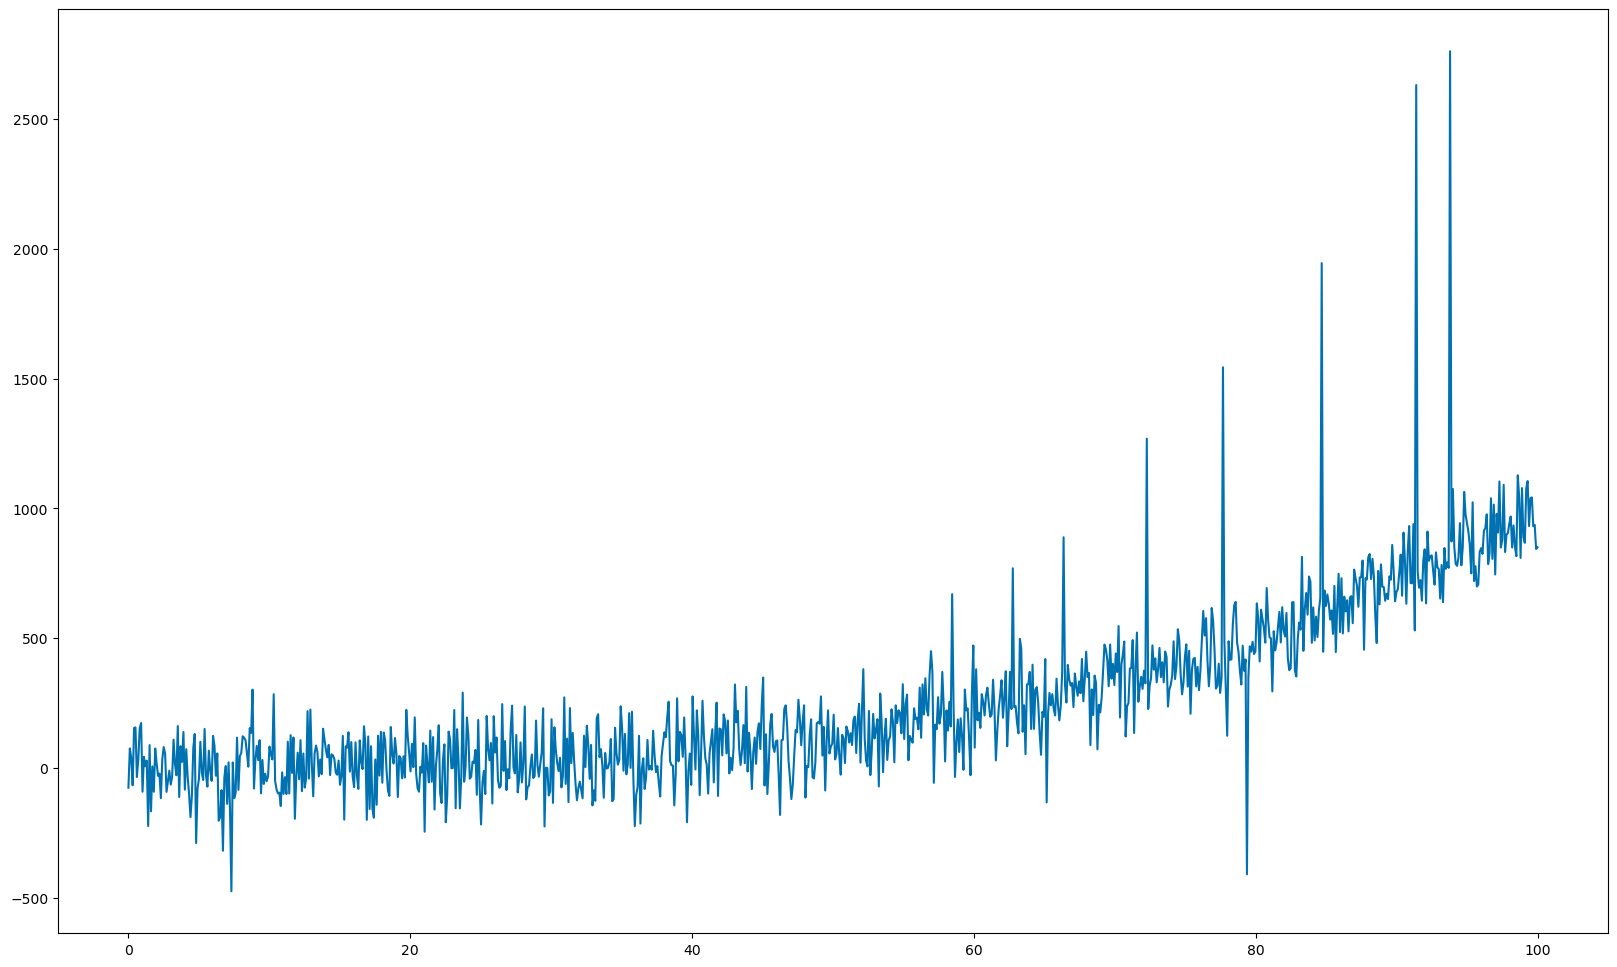

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

f = lambda x: x**3 - 2*x**2 + x - 1
f_q = lambda x: f(x)/1000 + np.random.randn(1)*100
X = np.linspace(0,100,1000)
Y = np.array([f_q(x) for x in X])
for i in range(20):
    ind = np.random.choice(np.arange(1000))
    Y[ind] = Y[ind] + np.random.choice([1,-1], p=[0.7,0.3]) * Y[ind]/0.5
plt.figure(figsize=(20,12))
plt.plot(X,Y)

In [14]:
df = pd.DataFrame({'Y' : Y.reshape(-1)})

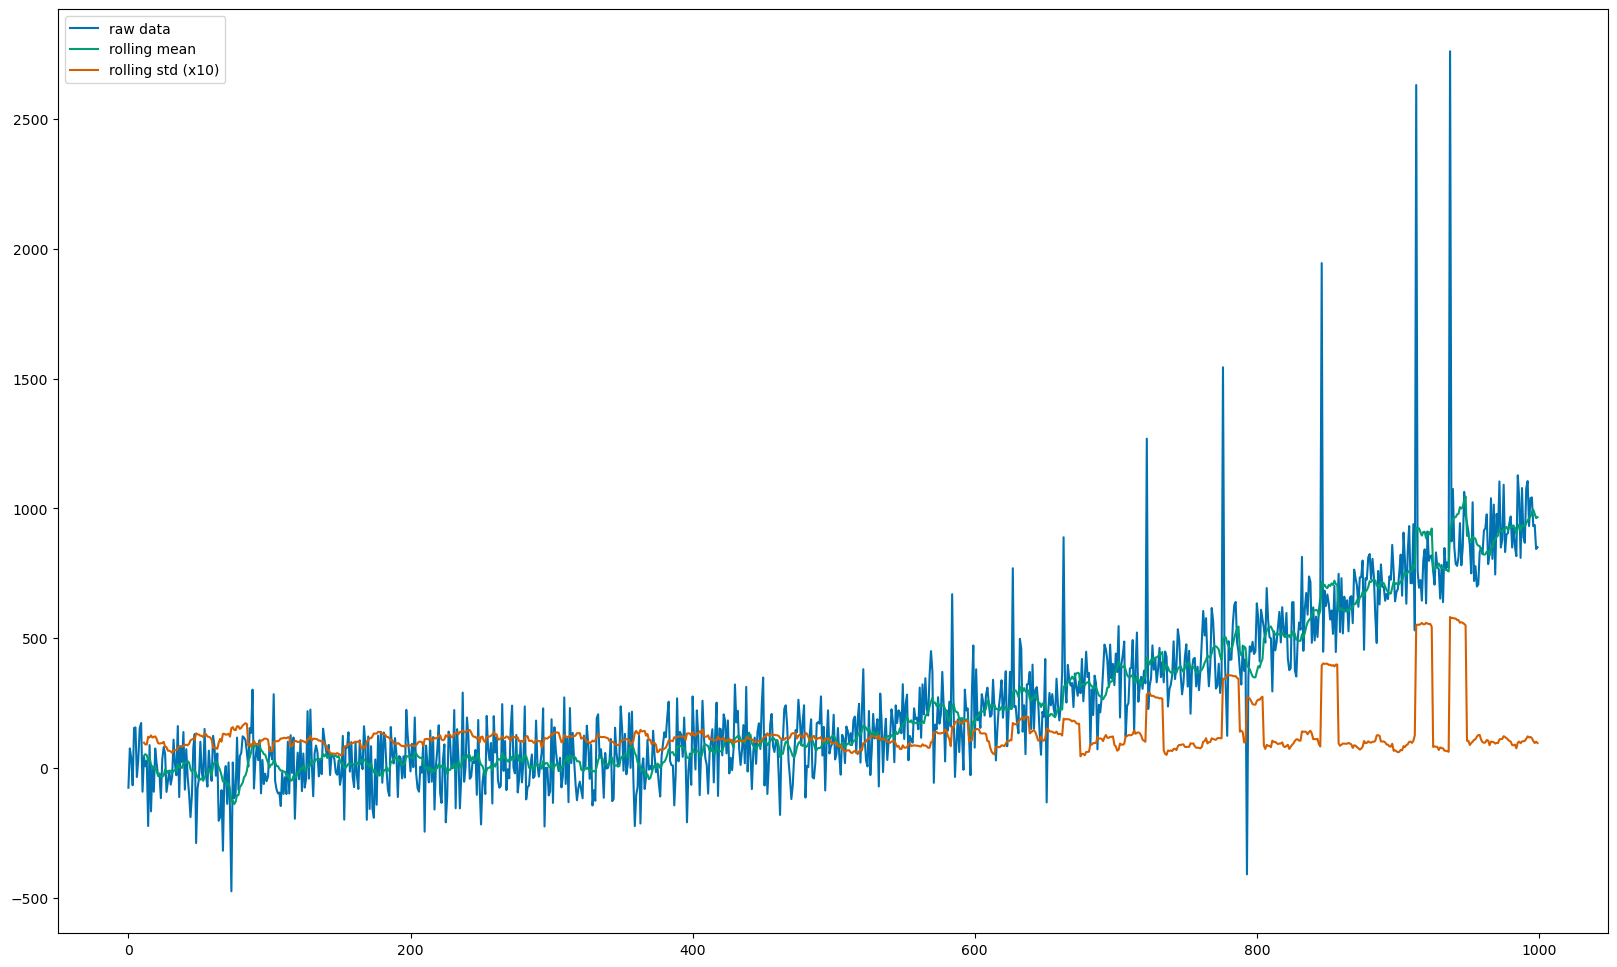

In [15]:
plot_rolling(df)

C:\Users\gaponovpavel\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


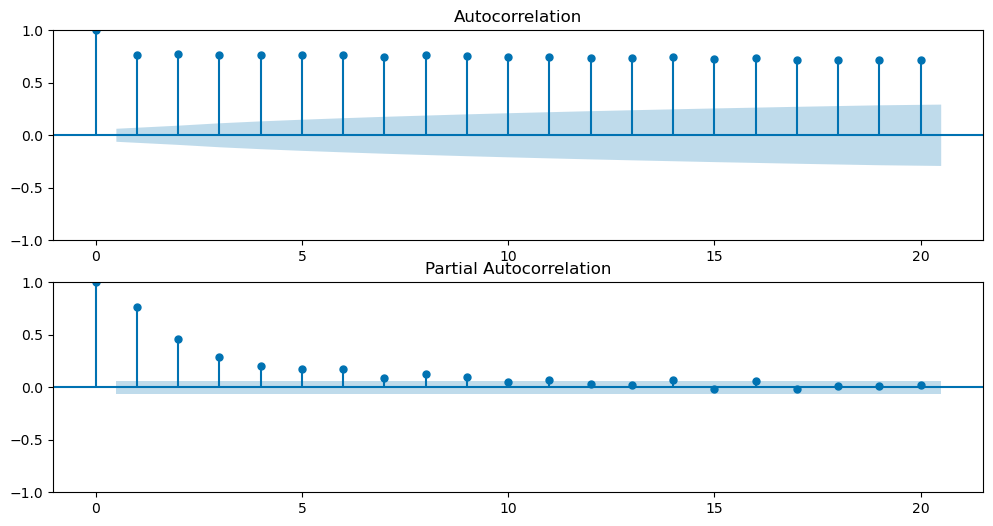

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df.Y.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df.Y.dropna(), ax=ax[1], lags=20)

In [18]:
df = pd.DataFrame({'B' : [0,1,2,3,4]})
df.ewm(com=1)

ExponentialMovingWindow [com=1,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [19]:
df.ewm(com=1).mean()

,B
0,0.000000
1,0.666667
2,1.428571
3,2.266667
4,3.161290


In [20]:
df = pd.DataFrame({'Y' : Y.reshape(-1)})

In [30]:
df['ewm'] = df.Y.ewm(30).mean()

In [31]:
df['true_f'] = [f(x)/1000 for x in X]

<AxesSubplot:>

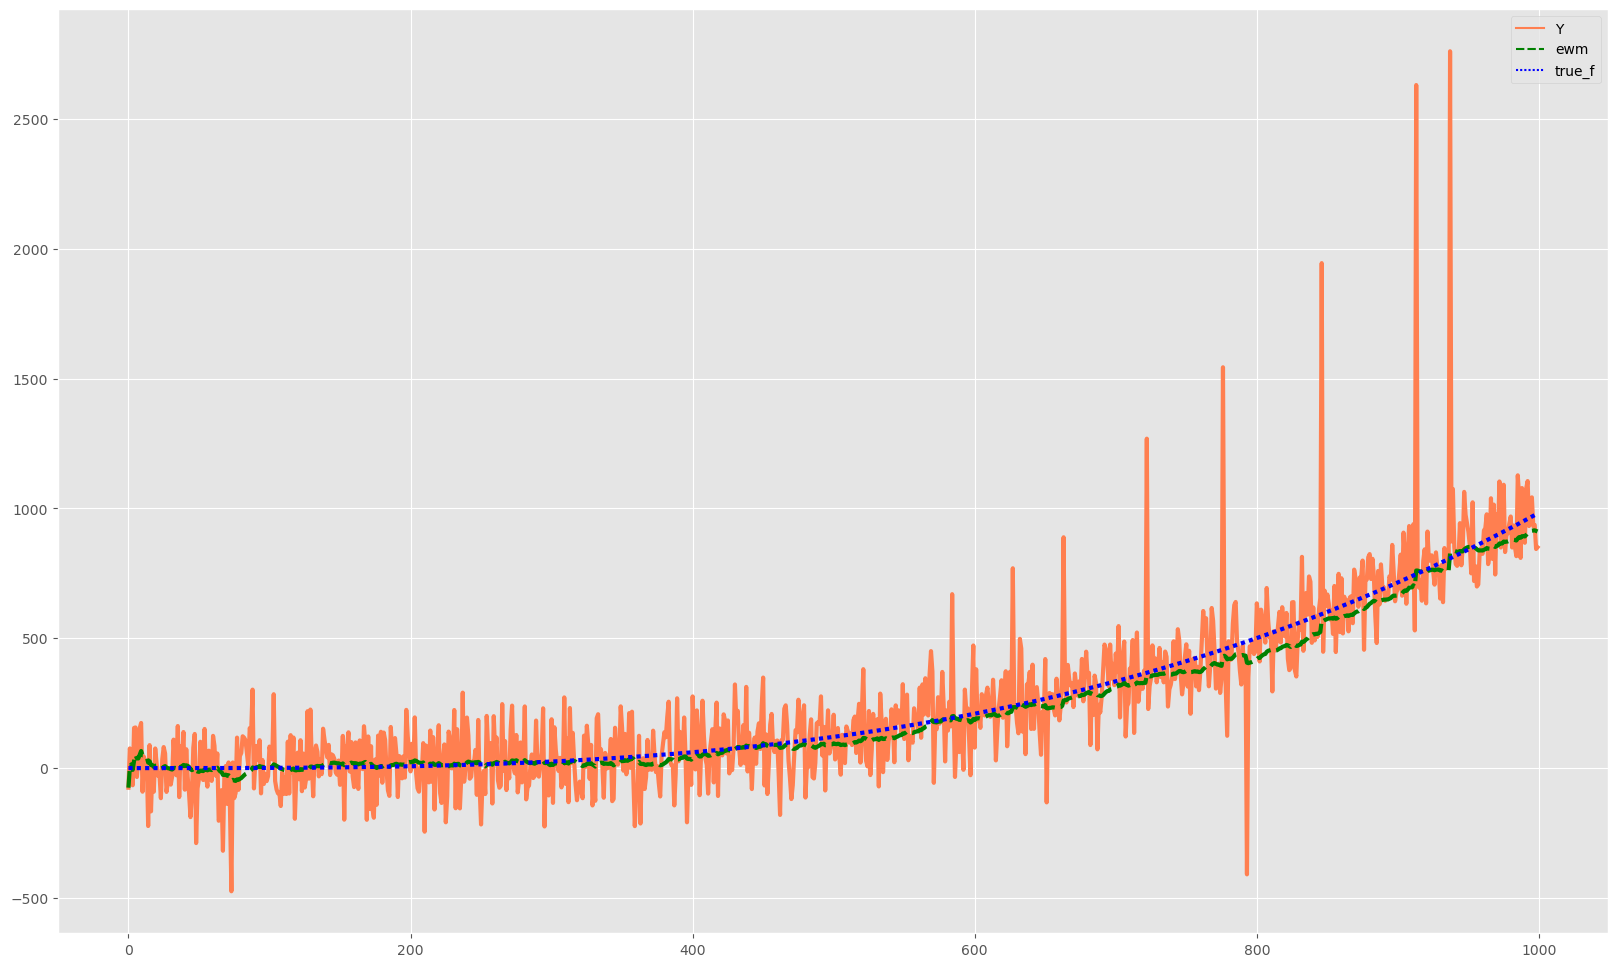

In [32]:
plt.figure(figsize=(20,12))
plt.style.use('ggplot')

sns.lineplot(data=df, palette=['#ff7f50', 'g', 'b'], linewidth=3)

<AxesSubplot:>

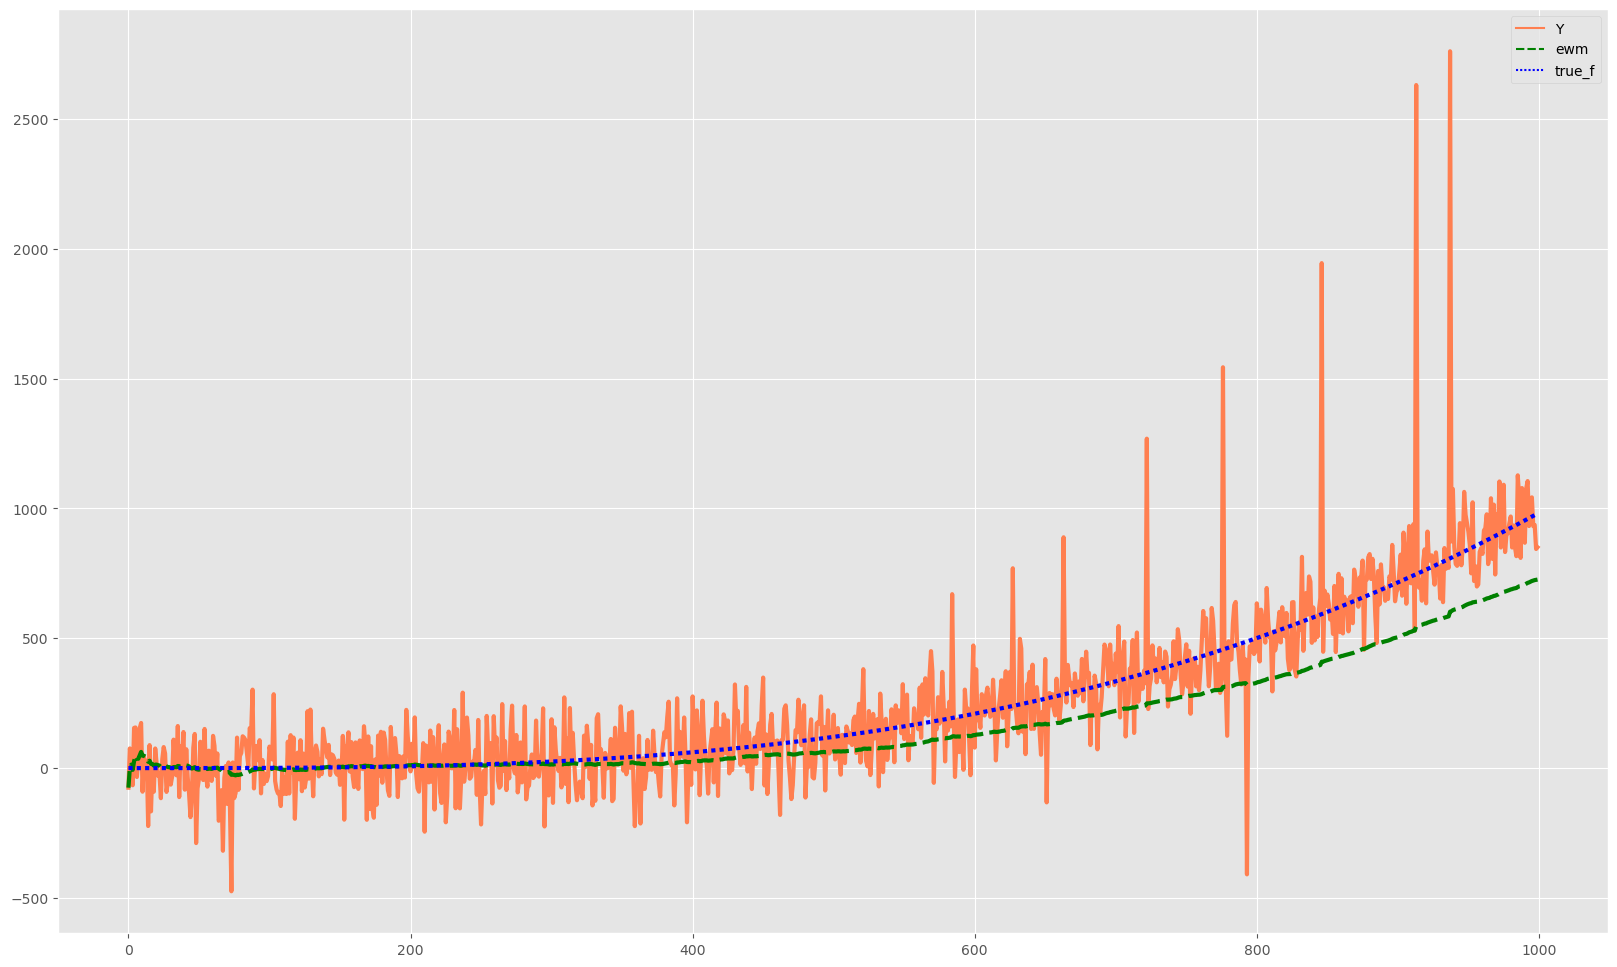

In [33]:
df = pd.DataFrame({'Y' : Y.reshape(-1)})
df['ewm'] = df.Y.ewm(120).mean()
df['true_f'] = [f(x)/1000 for x in X]
plt.figure(figsize=(20,12))
plt.style.use('ggplot')

sns.lineplot(data=df, palette=['#ff7f50', 'g', 'b'], linewidth=3)